Bay Wheels Trip Data Exploration

## Preliminary Wrangling

## A. Introduction

- Owned by Lyft, Bay Wheels is a bike-sharing company operating in the Bay Area. It first launched in 2013, later became one of the most welcomed bike-sharing services on the west coast in the U.S, and was acquired by Lyft in 2019.

 ![](https://pbs.twimg.com/media/EKPRMYgWwAAbicW.jpg)

In [169]:
# Import all the required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import matplotlib.ticker as ticker
from datetime import timedelta
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()


%matplotlib inline

In [3]:
# load in the dataset into a pandas dataframe, print statistics
df = pd.read_csv('2017-fordgobike-tripdata.csv')

### <<< High level overview of Data >>>

In [4]:
print(df.shape)
df.head(10)

(519700, 13)


,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type
0,80110,2017-12-31 16:57:39.6540,2018-01-01 15:12:50.2450,74,Laguna St at Hayes St,37.776435,-122.426244,43,San Francisco Public Library (Grove St at Hyde...,37.778768,-122.415929,96,Customer
1,78800,2017-12-31 15:56:34.8420,2018-01-01 13:49:55.6170,284,Yerba Buena Center for the Arts (Howard St at ...,37.784872,-122.400876,96,Dolores St at 15th St,37.766210,-122.426614,88,Customer
2,45768,2017-12-31 22:45:48.4110,2018-01-01 11:28:36.8830,245,Downtown Berkeley BART,37.870348,-122.267764,245,Downtown Berkeley BART,37.870348,-122.267764,1094,Customer
3,62172,2017-12-31 17:31:10.6360,2018-01-01 10:47:23.5310,60,8th St at Ringold St,37.774520,-122.409449,5,Powell St BART Station (Market St at 5th St),37.783899,-122.408445,2831,Customer
4,43603,2017-12-31 14:23:14.0010,2018-01-01 02:29:57.5710,239,Bancroft Way at Telegraph Ave,37.868813,-122.258764,247,Fulton St at Bancroft Way,37.867789,-122.265896,3167,Subscriber
5,9226,2017-12-31 22:51:00.9180,2018-01-01 01:24:47.1660,30,San Francisco Caltrain (Townsend St at 4th St),37.776598,-122.395282,30,San Francisco Caltrain (Townsend St at 4th St),37.776598,-122.395282,1487,Customer
6,4507,2017-12-31 23:49:28.4220,2018-01-01 01:04:35.6190,259,Addison St at Fourth St,37.866249,-122.299371,259,Addison St at Fourth St,37.866249,-122.299371,3539,Customer
7,4334,2017-12-31 23:46:37.1960,2018-01-01 00:58:51.2110,284,Yerba Buena Center for the Arts (Howard St at ...,37.784872,-122.400876,284,Yerba Buena Center for the Arts (Howard St at ...,37.784872,-122.400876,1503,Customer
8,4150,2017-12-31 23:37:07.5480,2018-01-01 00:46:18.3080,20,Mechanics Monument Plaza (Market St at Bush St),37.791300,-122.399051,20,Mechanics Monument Plaza (Market St at Bush St),37.791300,-122.399051,3125,Customer
9,4238,2017-12-31 23:35:38.1450,2018-01-01 00:46:17.0530,20,Mechanics Monument Plaza (Market St at Bush St),37.791300,-122.399051,20,Mechanics Monument Plaza (Market St at Bush St),37.791300,-122.399051,2543,Customer


In [5]:
# Data types and other info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 519700 entries, 0 to 519699
Data columns (total 13 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   duration_sec             519700 non-null  int64  
 1   start_time               519700 non-null  object 
 2   end_time                 519700 non-null  object 
 3   start_station_id         519700 non-null  int64  
 4   start_station_name       519700 non-null  object 
 5   start_station_latitude   519700 non-null  float64
 6   start_station_longitude  519700 non-null  float64
 7   end_station_id           519700 non-null  int64  
 8   end_station_name         519700 non-null  object 
 9   end_station_latitude     519700 non-null  float64
 10  end_station_longitude    519700 non-null  float64
 11  bike_id                  519700 non-null  int64  
 12  user_type                519700 non-null  object 
dtypes: float64(4), int64(4), object(5)
memory usage: 51.5+ MB


In [10]:
#cast type to category
df['user_type'] = df['user_type'].astype('category')
df['start_station_name'] = df['start_station_name'].astype('category')
df['end_station_name'] = df['end_station_name'].astype('category')

#cast type to datetime
df['start_time'] = pd.to_datetime(df['start_time'])
df['end_time'] = pd.to_datetime(df['end_time'])

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 519700 entries, 0 to 519699
Data columns (total 13 columns):
 #   Column                   Non-Null Count   Dtype         
---  ------                   --------------   -----         
 0   duration_sec             519700 non-null  int64         
 1   start_time               519700 non-null  datetime64[ns]
 2   end_time                 519700 non-null  datetime64[ns]
 3   start_station_id         519700 non-null  int64         
 4   start_station_name       519700 non-null  category      
 5   start_station_latitude   519700 non-null  float64       
 6   start_station_longitude  519700 non-null  float64       
 7   end_station_id           519700 non-null  int64         
 8   end_station_name         519700 non-null  category      
 9   end_station_latitude     519700 non-null  float64       
 10  end_station_longitude    519700 non-null  float64       
 11  bike_id                  519700 non-null  int64         
 12  user_type       

In [12]:
df['bike_id'] = df['bike_id'].astype('str')

In [13]:
df.dtypes

duration_sec                        int64
start_time                 datetime64[ns]
end_time                   datetime64[ns]
start_station_id                    int64
start_station_name               category
start_station_latitude            float64
start_station_longitude           float64
end_station_id                      int64
end_station_name                 category
end_station_latitude              float64
end_station_longitude             float64
bike_id                            object
user_type                        category
dtype: object

In [68]:
df.head(3)

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type
0,80110,2017-12-31 16:57:39.654,2018-01-01 15:12:50.245,74,Laguna St at Hayes St,37.776435,-122.426244,43,San Francisco Public Library (Grove St at Hyde...,37.778768,-122.415929,96,Customer
1,78800,2017-12-31 15:56:34.842,2018-01-01 13:49:55.617,284,Yerba Buena Center for the Arts (Howard St at ...,37.784872,-122.400876,96,Dolores St at 15th St,37.766210,-122.426614,88,Customer
2,45768,2017-12-31 22:45:48.411,2018-01-01 11:28:36.883,245,Downtown Berkeley BART,37.870348,-122.267764,245,Downtown Berkeley BART,37.870348,-122.267764,1094,Customer


In [211]:
# descriptive statistics of numerical data
df.describe()

,duration_sec,start_station_id,start_station_latitude,start_station_longitude,end_station_id,end_station_latitude,end_station_longitude,day_start,month_start,day_end,month_end,duration_min,hour
count,519700.000000,519700.000000,519700.000000,519700.000000,519700.000000,519700.000000,519700.000000,519700.000000,519700.000000,519700.000000,519700.000000,519700.000000,519700.000000
mean,1099.009521,95.034245,37.771653,-122.363927,92.184041,37.771844,-122.363236,15.844337,9.731716,15.841916,9.731393,18.316825,13.461037
std,3444.146451,86.083078,0.086305,0.105573,84.969491,0.086224,0.105122,8.807140,1.566787,8.806989,1.567735,57.402441,4.615019
min,61.000000,3.000000,37.317298,-122.444293,3.000000,37.317298,-122.444293,1.000000,6.000000,1.000000,1.000000,1.016667,0.000000
25%,382.000000,24.000000,37.773492,-122.411726,23.000000,37.774520,-122.410345,8.000000,8.000000,8.000000,8.000000,6.366667,9.000000
50%,596.000000,67.000000,37.783521,-122.398870,66.000000,37.783830,-122.398525,16.000000,10.000000,16.000000,10.000000,9.933333,14.000000
75%,938.000000,139.000000,37.795392,-122.391034,134.000000,37.795392,-122.391034,23.000000,11.000000,23.000000,11.000000,15.633333,17.000000
max,86369.000000,340.000000,37.880222,-121.874119,340.000000,37.880222,-121.874119,31.000000,12.000000,31.000000,12.000000,1439.483333,23.000000


In [70]:
dates = pd.to_datetime(df['start_time'])
df['day_start'] = dates.dt.day
df['dayofweek_start'] = dates.dt.dayofweek
df['month_start'] = dates.dt.month

In [71]:
dates_end = pd.to_datetime(df['end_time'])
df['day_end'] = dates_end.dt.day
df['dayofweek_end'] = dates_end.dt.dayofweek
df['month_end'] = dates_end.dt.month

In [73]:
dates_end = pd.to_datetime(df['end_time'])
df['day_end'] = dates_end.dt.day
df['dayofweek_end'] = dates_end.dt.dayofweek
df['month_end'] = dates_end.dt.month

In [74]:
df.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,day_start,dayofweek_start,month_start,day_end,dayofweek_end,month_end
0,80110,2017-12-31 16:57:39.654,2018-01-01 15:12:50.245,74,Laguna St at Hayes St,37.776435,-122.426244,43,San Francisco Public Library (Grove St at Hyde...,37.778768,-122.415929,96,Customer,31,6,12,1,0,1
1,78800,2017-12-31 15:56:34.842,2018-01-01 13:49:55.617,284,Yerba Buena Center for the Arts (Howard St at ...,37.784872,-122.400876,96,Dolores St at 15th St,37.766210,-122.426614,88,Customer,31,6,12,1,0,1
2,45768,2017-12-31 22:45:48.411,2018-01-01 11:28:36.883,245,Downtown Berkeley BART,37.870348,-122.267764,245,Downtown Berkeley BART,37.870348,-122.267764,1094,Customer,31,6,12,1,0,1
3,62172,2017-12-31 17:31:10.636,2018-01-01 10:47:23.531,60,8th St at Ringold St,37.774520,-122.409449,5,Powell St BART Station (Market St at 5th St),37.783899,-122.408445,2831,Customer,31,6,12,1,0,1
4,43603,2017-12-31 14:23:14.001,2018-01-01 02:29:57.571,239,Bancroft Way at Telegraph Ave,37.868813,-122.258764,247,Fulton St at Bancroft Way,37.867789,-122.265896,3167,Subscriber,31,6,12,1,0,1


In [75]:
# Transfor the day of the week and ordinate
mapper = {0:'Monday', 1:'Tuesday', 2:'Wednesday', 3:'Thursday', 4:'Friday', 5:'Saturday', 6:'Sunday'}

df['dayofweek_start'] = df['dayofweek_start'].map(mapper)
df['dayofweek_end'] = df['dayofweek_end'].map(mapper)

In [76]:
week_order = ['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday']
ordered_cat = pd.api.types.CategoricalDtype(ordered= True, categories = week_order)
df['dayofweek_start'] = df['dayofweek_start'].astype(ordered_cat)

In [77]:
week_order = ['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday']
ordered_cat = pd.api.types.CategoricalDtype(ordered= True, categories = week_order)
df['dayofweek_end'] = df['dayofweek_end'].astype(ordered_cat)

In [78]:
# create a new column for minutes
df['duration_min'] = df['duration_sec']/60

### What is the structure of your dataset?

There are 519700 rows and 23 columns in the data set.


### What is/are the main feature(s) of interest in your dataset?

I'm most interested in figuring out what features affect the rentals and how generally the process of trips.

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

I expect that user-type and all date time variables eg. months, duration_min etc. will play a big role in my data analysis.

## Univariate Exploration

### How are the user types distributed?

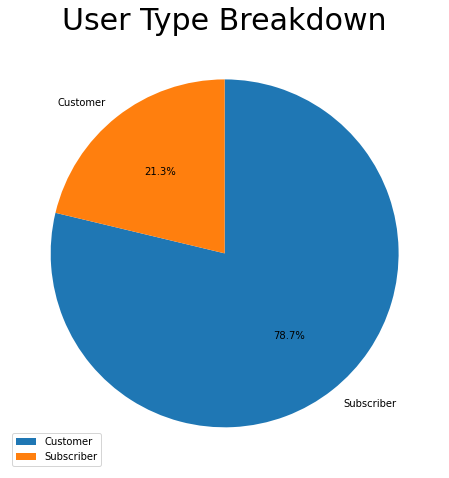

In [64]:
# plot pie chart 
sorted_counts = df['user_type'].value_counts(normalize=True)
plt.figure(figsize = [12, 8])
labels = ['Customer', 'Subscriber']
plt.pie(sorted_counts , labels = sorted_counts.index,
       startangle = 90 , counterclock = False , autopct='%1.1f%%');
plt.title('User Type Breakdown' , fontsize=30 , ha='center')
plt.legend(labels,loc=3 , fontsize=10)
plt.show()


- Looks like majority of the users are subscribers

## Duration per Ride

In [79]:
df.duration_min.describe()

count    519700.000000
mean         18.316825
std          57.402441
min           1.016667
25%           6.366667
50%           9.933333
75%          15.633333
max        1439.483333
Name: duration_min, dtype: float64

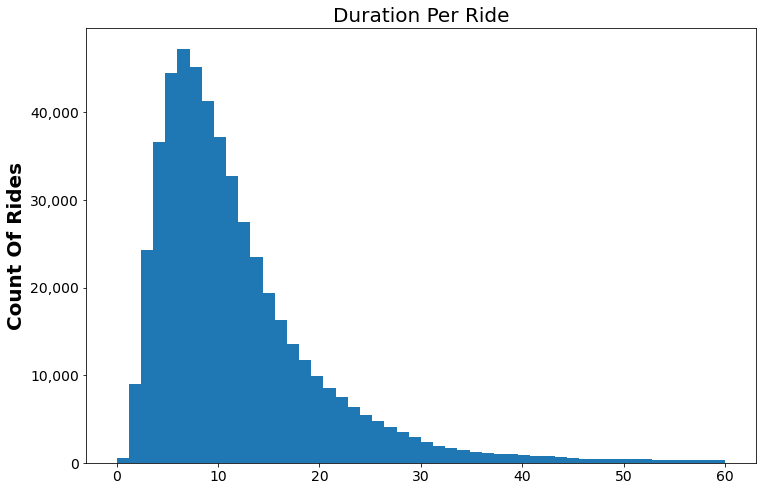

In [137]:
#plot the histogram and tweak the plot
plt.hist(df['duration_min'], bins = 50, range = (0, 60))
plt.xticks(size = 14)
plt.yticks(size = 14)
plt.title("Duration Per Ride", size = 20)
# Add y label and format it
plt.ylabel('Count of rides'.title(),
               fontsize = 20, weight = "bold")
plt.gcf().set_size_inches(12,8)
plt.gca().get_yaxis().set_major_formatter(ticker.FuncFormatter(lambda x, p: format(int(x), ',')))
plt.gca().get_xaxis().set_major_formatter(ticker.FuncFormatter(lambda x, p: format(int(x), ',')))

plt.show()

### Observations
- Most rides and rentals take roughly 8-10 minutes.

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

All the duration_min variable had large number of values the plot i used was enough to show me the duration of most rides, I therefore didnt think it was necessary for any transformations.

### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

Fisrt I had present in the data duration_sec variable. I therefore created another column duration_min which I though was more realistic. There were a couple of outliers in the duration min variable but overall it showed what was desired.

## Multivariate

- To start off with, I want to look at the pairwise correlations present between features in the data.

In [171]:
#getting date from started_at
df['date'] = df['start_time'].dt.date.astype('datetime64') 

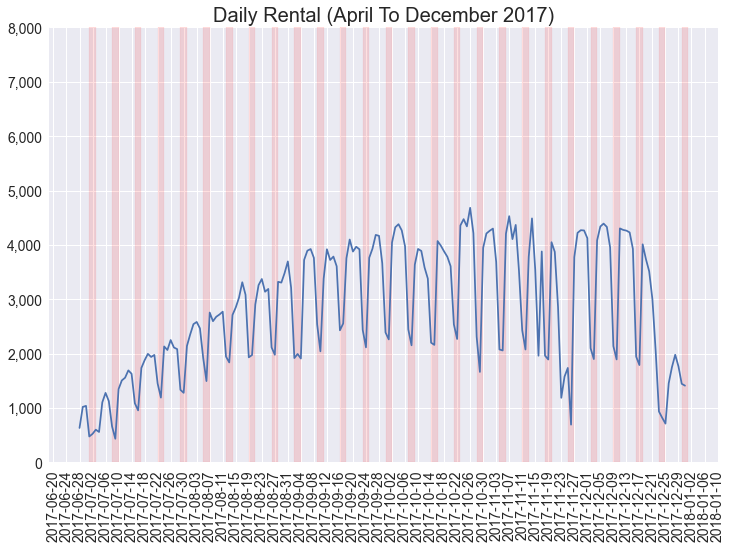

In [176]:
#creating daily rental count dataset
rental_by_day = df.groupby('date').count()['user_type']

#changing theme to seaborn and creating the plot
plt.style.use('seaborn')
plt.plot(rental_by_day)

#modifying x-ticks and y-ticks, and adding titles
plt.xticks(rotation=90, size = 14)
plt.yticks(size = 14)
plt.ylim(0,8000)
plt.title("Daily Rental (April To December 2017)", size = 20)
plt.gca().get_yaxis().set_major_formatter(ticker.FuncFormatter(lambda x, p: format(int(x), ',')))
tick_spacing = 4
plt.gca().xaxis.set_major_locator(ticker.MultipleLocator(tick_spacing))

#set figure to a larger size
plt.gcf().set_size_inches(12,8)

#adding bandwidths for weekends
for i in rental_by_day.index[rental_by_day.index.weekday == 5]:
    plt.axvspan(i, i+timedelta(days=2),color='red', alpha=0.12)

plt.show()

### Observation
- It appears that weekends tend to have lower rentals than weekdays.

### Number of User Type by Weekday

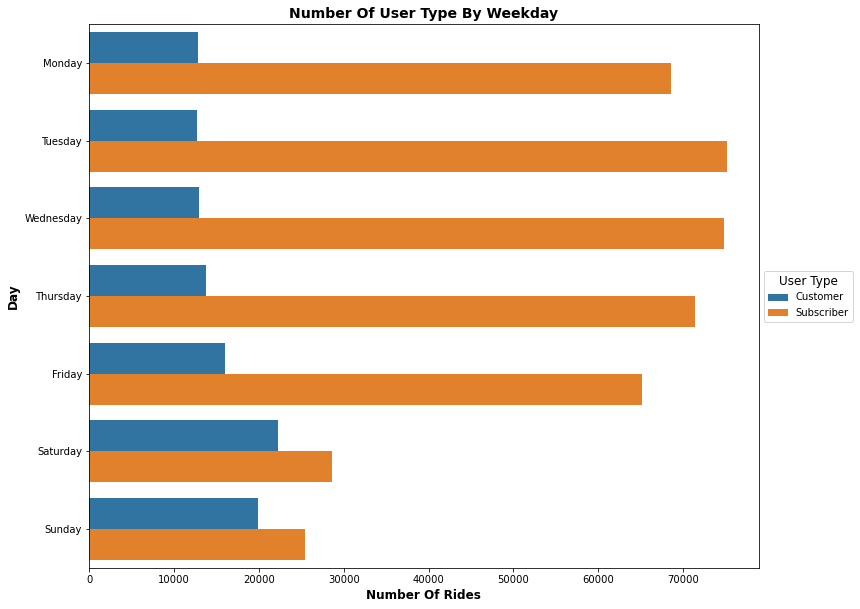

In [105]:
plt.figure(figsize=[12, 10])

sb.countplot(data = df, y='dayofweek_start', hue = 'user_type');


# Add title and format it
plt.title("Number of user type by weekday".title(),
               fontsize = 14, weight = "bold")
# Add x label and format it
plt.xlabel('Number of rides'.title(),
               fontsize = 12, weight = "bold")
# Add y label and format it
plt.ylabel('Day'.title(),
               fontsize = 12, weight = "bold")

plt.legend(loc='center left', bbox_to_anchor=(1, 0.5),
           title="User Type", title_fontsize = 12);

### Observations

- It generally looks like subscribers rent bikes or ride more than customers.
- Also you can feel that subscribers tend to rent or ride less during the weekends.
- Surprisingly compared to weekdays, it appears that customers would be renting or riding more during the weekends.

### Duration of minutes per month.

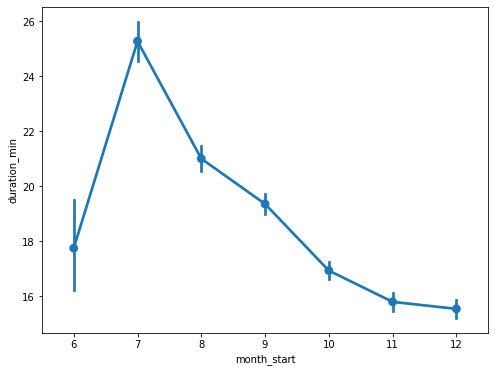

In [113]:
# Plot the pointplot
plt.figure(figsize = (8,6))
base_color = sb.color_palette()[0]
sb.pointplot(data = df, x = 'month_start', y = 'duration_min', color = base_color, linestyles = '-');

### Observation
- On average it looks like July has more rentals or rides judging by the average minutes per ride.

### Most frequent origins of start

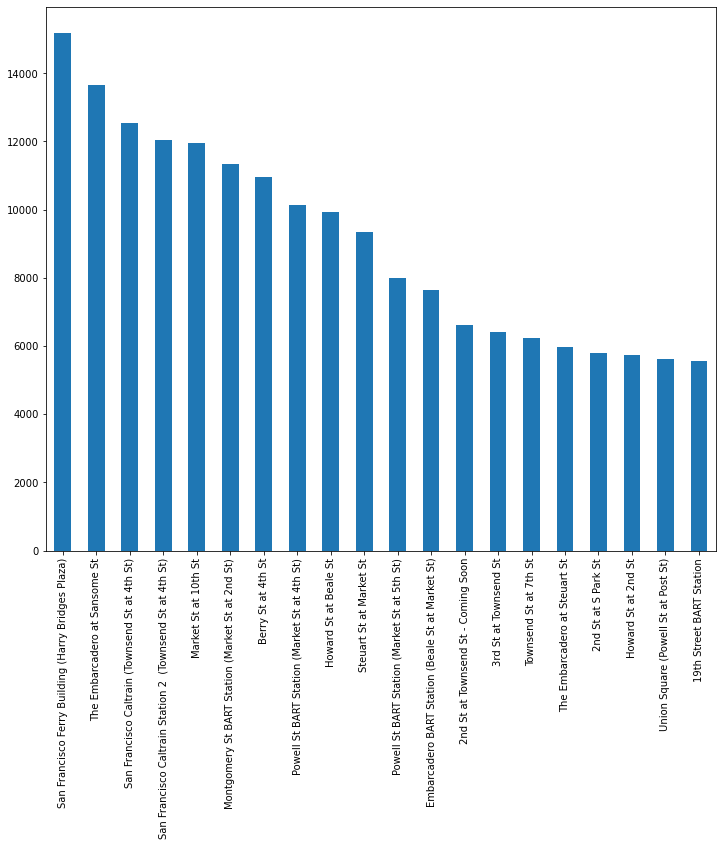

In [132]:
plt.figure(figsize=(12,10))
default_color = sb.color_palette()[0]

df['start_station_name'].value_counts().head(20).plot(kind='bar', color = default_color);

### Observation
Looks like the most frequent starting origins are:
    <li> Harry Bridges Plaza
    <li> The Embarcadero at Sansome St
    <li> San Fransisco Caltrain

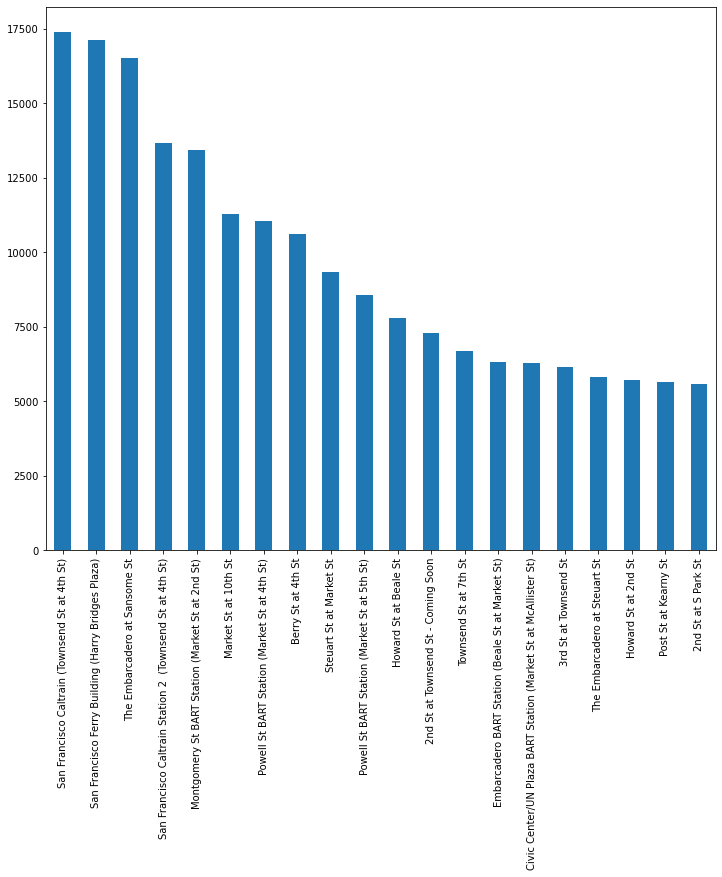

In [131]:
plt.figure(figsize=(12,10))
default_color = sb.color_palette()[0]

df['end_station_name'].value_counts().head(20).plot(kind='bar', color = default_color);

### Most frequent destinations
In contrast the most frequet destinations are:

- Townsend St at 4th St
- Harry bridges plaza
- The Embarcadero at Sansome St

### When are bikes mostly rented out?

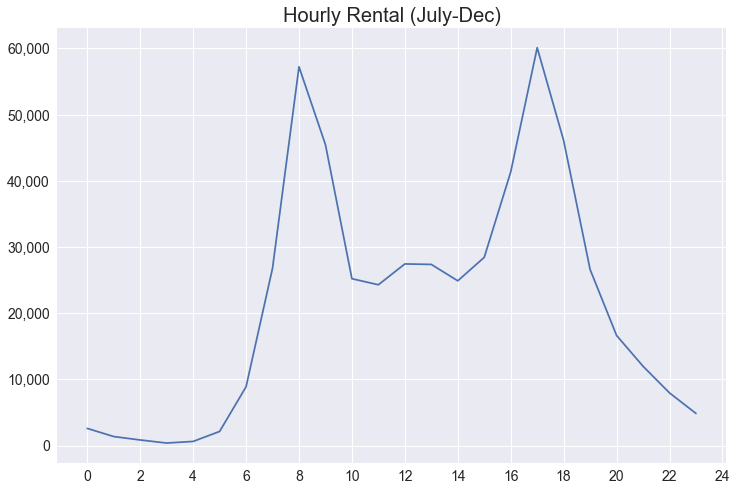

In [192]:
#create the grouped dataset
df['hour'] = df.start_time.dt.hour
hourly = df.groupby('hour').count().user_type

#plot the line chart and further tweak the plot
plt.plot(hourly)
plt.xticks(size = 14)
plt.yticks(size = 14)
plt.title("Hourly Rental (July-Dec)", size = 20)
plt.gca().get_yaxis().set_major_formatter(ticker.FuncFormatter(lambda x, p: format(int(x), ',')))
tick_spacing = 2
plt.gca().xaxis.set_major_locator(ticker.MultipleLocator(tick_spacing))
plt.gcf().set_size_inches(12,8)

plt.show()

### Observation
- The peak seems to be at 8.00 in the morning. Makes sense since people are going to work or are starting their daily hustle.
- Second peak is around 18.00 makes sense since people are closing off.

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

A couple of interesting points here:

- The  month of July recorded the highest average minutes in terms of duration_min vs month.
- Surprisingly there was a negative correlation between weekends and count of rides. It appeared as though most rentals or rides occurred on weekdays.
- There were 2 peaks of hourly rentals.
- Subscribers rented bikes much more than customers


### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

- Nothing out of the ordinary.


## Multivariate Exploration

The main thing I want to explore in this part of the analysis is how duration min, user type and Weekday corrlate.

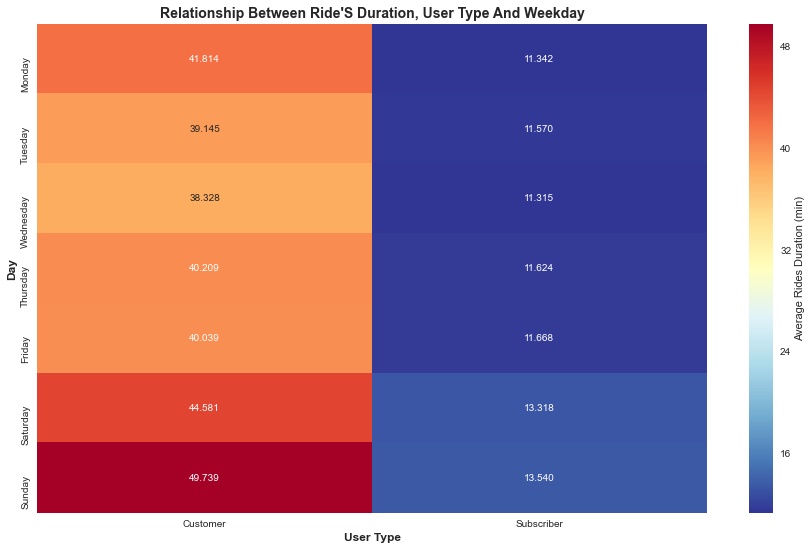

In [193]:
plt.figure(figsize=[15, 9])

#--Calculating the average of ride's duration
#--Transforming the data in a pivot table to plot the heatmap
cat_means = df.groupby(['user_type','dayofweek_start']).mean()['duration_min']
cat_means = cat_means.reset_index(name = 'duration_min_avg')
cat_means = cat_means.pivot(index = 'dayofweek_start', columns = 'user_type', 
                            values = 'duration_min_avg')
sb.heatmap(cat_means, annot = True, fmt = '.3f', 
           cbar_kws = {'label':'Average Rides Duration (min)'}, cmap = 'RdYlBu_r')


# Add title and format it
plt.title("Relationship between ride's duration, user type and weekday".title(),
               fontsize = 14, weight = "bold")
# Add x label and format it
plt.xlabel('User Type'.title(),
               fontsize = 12, weight = "bold")
# Add y label and format it
plt.ylabel('Day'.title(),
               fontsize = 12, weight = "bold");

## Observation
- Customers spent more time on rides mostly on Sunday.
- In general Sunday seems to be the day people spend time most on bikes.

### What can we say about the end stations?

In [199]:
df.columns

Index(['duration_sec', 'start_time', 'end_time', 'start_station_id',
       'start_station_name', 'start_station_latitude',
       'start_station_longitude', 'end_station_id', 'end_station_name',
       'end_station_latitude', 'end_station_longitude', 'bike_id', 'user_type',
       'day_start', 'dayofweek_start', 'month_start', 'day_end',
       'dayofweek_end', 'month_end', 'duration_min', 'month', 'date', 'hour'],
      dtype='object')

In [204]:
# Now, we have to define the Bounding Box. Bounding Box is the area defined by two longitudes and two latitudes 
# that will include all spatial points.
BBox = ((df.end_station_longitude.min(),   df.end_station_longitude.max(),      
         df.end_station_latitude.min(), df.end_station_latitude.max()))

In [205]:
BBox

(-122.4442926049, -121.8741186, 37.3172979, 37.8802224459)

In [207]:
# read in map
mymap = plt.imread('map.png')

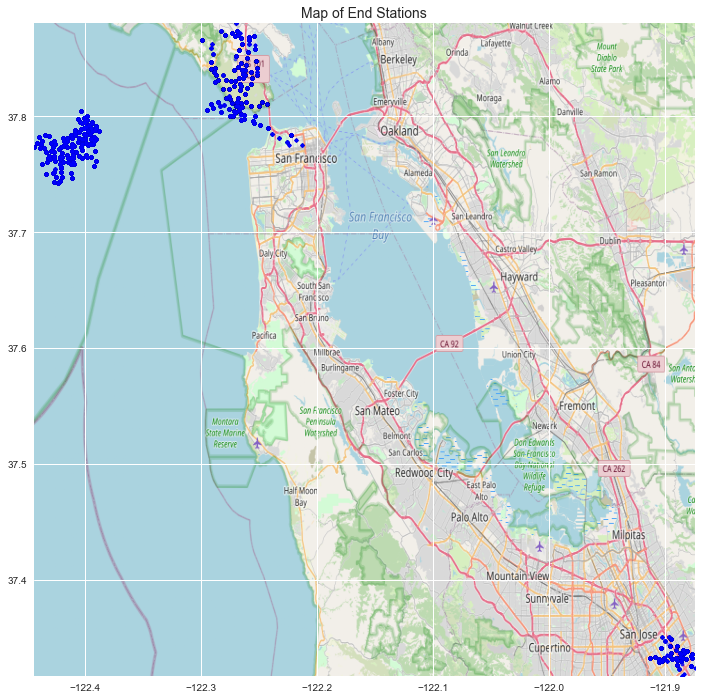

In [210]:
# plot map
fig, ax = plt.subplots(figsize = (15,12))
ax.scatter(df.end_station_longitude, df.end_station_latitude, zorder=1, alpha= 0.2, c='b', s=10)
ax.set_title('Map of End Stations' , size=14)
ax.set_xlim(BBox[0],BBox[1])
ax.set_ylim(BBox[2],BBox[3])
ax.imshow(mymap, zorder=0, extent = BBox, aspect= 'equal');

### Observations
- Most destinations were on Sanjose and San Fransico.

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?
This part was quite useful as it drilled down the data to a deeper level of detail. We could see that when combined with weekdays customers generally have more rentals on Sunday more than even subscribers.


### Were there any interesting or surprising interactions between features?
We observed on map that most destinations were downtown, in sanjose and uptown in sanfransisco.

# END OF NOTEBOOK